In [1]:
pwd

'/mnt/md0/isshamie/Projects/Mito_Trace/workflow/notebooks/clone_af_dendrograms'

In [2]:

# INDIR = "/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/"
# OUTDIR = "/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/barcodes/btwnClones_dendro_dt_0.6/"
# DONOR = 0
# dendroThresh=0.6

#clones_meta = '/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/results/clones_summary/feb23_2022/clones_summary.csv'
#clones_indir = "/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/"
#clone_sizes_in_f = "/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/gff_A2_black/annotation_clones/clone_counts/minCellConds_1/clone_sizes.csv"
# INDIR = "/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2//data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_30/"
# OUTDIR = "/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_30/barcodes/btwnClones_dendro_dt_dynamic"
# DONOR = 0

INDIR = "/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_prefilterMerge_impute/knn/kparam_30"
OUTDIR = "/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_prefilterMerge_impute/knn/kparam_30/barcodes/btwnClones_dendro_dt_dynamic_101022"
DONOR = 0

dendroThresh = "dynamic"

# INDIR = "/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_30"
# OUTDIR = "/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_30/barcodes/btwnClones_dendro_dt_0.6"
# DONOR = 1
#dendroThresh = "dynamic" #0.6

verbose=False

mt_ref="/data/Mito_Trace/data/processed/genomes/mtMasked/GRCh38_MT_blacklist_A2_2020/chrM.fasta"

In [3]:
import src.utils.variant_utils as vu
import src.utils.dendro_clust as dc

import mplh.cluster_help as ch
import mplh.fig_utils as fu

from os.path import join, exists, dirname
from glob import glob
import pickle
import os
import vireoSNP
import numpy as np
from scipy import sparse
from scipy.io import mmread
import matplotlib.pyplot as plt
from scipy.stats import hypergeom
print(vireoSNP.__version__)
import pandas as pd
import seaborn as sns
from vireoSNP import Vireo
np.set_printoptions(formatter={'float': lambda x: format(x, '.5f')})
import scipy
from itertools import combinations
#from src.utils import utils  as ut

fig_utils from mplh
0.5.6


In [4]:
%load_ext autoreload
%autoreload 2

In [5]:
out_f = join(OUTDIR, f"donor{DONOR}")

### Load cells_meta 
### Create clones_meta - get number of cells in a clone and donor

In [6]:
cells_meta = pd.read_csv(join(INDIR, "cells_meta.tsv"), sep="\t")
cells_meta["lineage"] = cells_meta.apply(lambda x: f'{x["donor"]}_{x["lineage"]}', axis=1)
cells_meta

,ID,lineage,donor,condition
0,AAACTGCAGACTTCCA-1_Input,0_0,0,Input
1,AAACTGCTCCAACGCG-1_Input,0_0,0,Input
2,AAAGGATCAGATAAGT-1_Input,0_0,0,Input
3,AAAGGATTCCTGACCT-1_Input,0_0,0,Input
4,AAAGGGCTCGTTACAG-1_Input,0_0,0,Input
...,...,...,...,...
6604,TAGGTGTGTACGTAAA-1_Input,1_25,1,Input
6605,TCCCACAGTTCAGAAA-1_Input,1_25,1,Input
6606,TCTCAGCCAGCAATGG-1_Input,1_25,1,Input
6607,TGGGTGCAGCGCCTAC-1_Input,1_25,1,Input


In [7]:
conditions = cells_meta["condition"].unique()

In [8]:
clones_meta_df = pd.DataFrame(cells_meta.groupby("lineage").size(), columns=["size"]) #, index=["size"])
clones_meta_df["donor"] = [x.split("_")[0] for x in clones_meta_df.index]
clones_meta_df["donor"] = clones_meta_df["donor"].astype(int)
clones_meta_df

,size,donor
lineage,,
0_0,447,0
0_1,279,0
0_10,106,0
0_11,105,0
0_12,104,0
...,...,...
1_5,165,1
1_6,159,1
1_7,142,1


In [9]:
curr_clones = clones_meta_df[clones_meta_df["donor"]==DONOR]
# cells_meta = pd.read_csv(join(INDIR, "cells_meta.tsv"), sep='\t')#.sort_values(["donor", "lineage"])
curr_labels = cells_meta[cells_meta["donor"]==DONOR]

In [10]:
# curr_clones = clones_meta_df[clones_meta_df["donor"]==DONOR].set_index("lineage")
# curr_clones

## Load AF and DP

In [11]:
af_indir = join(INDIR, "sc_af", f"donor{DONOR}")
AF_df = pd.read_csv(join(af_indir, "af.tsv"), index_col=0, sep="\t")
DP_df = pd.read_csv(join(af_indir, "dp.tsv"), index_col=0, sep="\t")


### Functions to get mean and median

In [12]:
def calc_mean(cells, af):
    #print(cells.head())
    return af.loc[:,cells["ID"].values].mean(axis=1)

def calc_median(cells, af):
    #print(cells.head())
    return af.loc[:,cells["ID"].values].median(axis=1)

def calc_mean_with_coverage(cells, af, cov, min_cov=30):
    keep_inds = cov.loc[:, cells["ID"].values]
    keep_inds = keep_inds[keep_inds >= min_cov].columns
    #print('# dropped inds', len(cells["ID"].values)-len(keep_inds))
    return af.loc[:,keep_inds].mean(axis=1)

In [24]:
%matplotlib inline
def cluster_and_plot(df, dp, clones_meta, vmax, to_sqrt, name):
    # Set title and full name prefix
    tit = f"AF Max={vmax}"
    name = f"{name}.{vmax}"
    if to_sqrt:
        name = name + ".sqrt"
        tit = f"{tit} (square root)"
        df = np.sqrt(df)
    df = np.clip(df, 0, vmax)
    
    # Get variant types
    variants_df = vu.add_ref_to_variants(variants=df.columns.values,
                                         mt_df=vu.load_mt_ref(mt_ref))
    variants_df = vu.type_of_variants(variants_df, to_preproc=False)
    
    clones_meta = clones_meta.drop("donor", axis=1, errors="ignore")
    # Dynamic cluster
    if not (df.shape[0] == 1 or  df.shape[1] == 1 ):
        if dendroThresh == "dynamic":
            clusters, link = dc.run_dynamic_hyper(df, metric='cosine', method='complete', deepSplit=3)
            clones_meta.loc[:, "den_clust"] = clones_meta.apply(lambda x: f'C{clusters.loc[x.name, "labels"]}', axis=1)
        else:
            den = dc.dendro_cluster(df, g, d_thresh=dendroThresh)
            clones_meta = dc.add_cluster_labels(den,clones_meta)
        size_pvals = dc.cluster_stats(clones_meta, out_f= name )
        #clones_meta[:, "donor"]= [x.split("_")[0] for x in clones_meta.index]
        clones_meta = clones_meta.loc[df.index]
    else:
        with open(name+".dendrogram_pvals.txt", "w") as f:
            f.write("no cells")

    ## Group clones using dendrogram and run stats on size differences in the groups

    ## Plot with dendro clusters

    if not (df.shape[0] == 1 or  df.shape[1] == 1 ):
        g = ch.plot_cluster(df, row_meta=clones_meta[["size"]], to_row_clust=True, to_col_clust=True,
                            col_meta=variants_df[["variant type", "variant change"]], col_clr_schemes="categorical",
                            row_clr_schemes={"size":"sequential","den_clust":"categorical"}, 
                            vmax=vmax, vmin=0, cmap="rocket_r",
                            row_linkage=link)
        plt.suptitle(tit)
        fu.helper_save(name+ ".dendro.NoCondition.AF.png",to_pdf=True, to_svg=True)

        inds = g.dendrogram_row.dendrogram["leaves"]
        cols = g.dendrogram_col.dendrogram["leaves"]
        g1d = ch.plot_cluster(dp.iloc[inds, cols], row_meta=clones_meta, to_row_clust=False, to_col_clust=False,
                              row_clr_schemes={"size":"sequential", "den_clust":"categorical"}, 
                              col_meta=variants_df[["variant type", "variant change"]], col_clr_schemes="categorical",
                              cmap="rocket_r")
        g1d.ax_cbar.set_title("log2(reads+1)")
        fu.helper_save(name+".dendro.NoCondition.DP.png",to_pdf=True, to_svg=True)#, f=g1d.figure)
        
        df = df.iloc[inds,cols]
        clones_meta = clones_meta.loc[df.index]        
        df.to_csv(name + ".af.csv")
    else:
        f = plt.figure()
        plt.title("no cells")
        f.savefig(name+".dendro.NoCondition.AF.png")
    return


### Calculate clone-barcode mean

In [19]:
mean_af = curr_labels.groupby(["lineage"]).apply(calc_mean, af=AF_df)
anno = mean_af.reset_index()[["lineage"]]
mean_dp = curr_labels.groupby(["lineage"]).apply(calc_mean, af=np.log2(DP_df+1))
mean_dp = mean_dp.loc[mean_af.index, mean_af.columns]

# Get mean with no low coverage
mean_nocov_af = curr_labels.groupby(["lineage"]).apply(calc_mean_with_coverage, af=AF_df, cov=DP_df)  

## Remove low valued variants
out_f_rmLow = out_f + ".rmLowVars"
mean_rmLow_af = mean_af.copy().loc[:,~(mean_af<0.01).all(axis=0)]
mean_rmLow_dp = mean_dp.loc[mean_rmLow_af.index, mean_rmLow_af.columns]


#anno_dp = mean_dp.reset_index()[["lineage"]]
# na_cells = curr_labels.loc[curr_labels["lineage"].isnull()]
# na_mean_af = na_cells.groupby("condition").apply(calc_mean, af=AF_df)

# if not (na_mean_af.shape[0] == 0):
#     print('na shape', na_mean_af.shape)
#     na_anno = pd.concat((anno,pd.DataFrame({"lineage":["None"]*len(na_mean_af.index)})), ignore_index=True)
#     na_concat = pd.concat((mean_af.reset_index(drop=True), na_mean_af.reset_index(drop=True)), ignore_index=True)
#     na_mean_dp = na_cells.groupby("condition").apply(calc_mean, af=np.log2(DP_df+1))
#     na_dp_concat = pd.concat((mean_dp, na_mean_dp.reset_index(drop=True)), ignore_index=True)
# else:
#     na_anno = anno
#     na_concat = mean_af.reset_index(drop=True)
#     na_dp_concat = mean_dp
     


distances
[0.29456 0.00341 0.29907 0.18356 0.29974 0.00717 0.29421 0.30471 0.48823
 0.35965 0.29980 0.00201 0.46150 0.33296 0.02272 0.09748 0.00989 0.30432
 0.29733 0.30549 0.01660 0.30314 0.00323 0.02712 0.37750 0.32279 0.18696
 0.48311 0.49951 0.00316 0.29782 0.29730 0.01995 0.29545 0.29407 0.29329
 0.01555 0.42137 0.02993 0.29604 0.01417 0.02775 0.29333 0.10924 0.01184
 0.29289 0.29487 0.08058 0.30877 0.36313 0.29736 0.02470 0.01411 0.02363
 0.30348 0.01689 0.29219 0.31118 0.14356 0.05472 0.42420 0.29357 0.29341
 0.29222 0.01944 0.01310 0.17200 0.02163 0.00757 0.29629 0.18090 0.30438
 0.00686 0.29483 0.30695 0.48425 0.35462 0.29910 0.00220 0.48641 0.33573
 0.02382 0.09306 0.00911 0.30716 0.29700 0.30769 0.01698 0.30371 0.00219
 0.02811 0.38583 0.33061 0.18732 0.48946 0.50091 0.00174 0.30079 0.29892
 0.02144 0.29942 0.29559 0.42007 0.04102 0.30237 0.02648 0.03894 0.28997
 0.11983 0.02316 0.30045 0.29924 0.08840 0.31397 0.36632 0.30274 0.03725
 0.02875 0.03595 0.30980 0.03006 0.30087 

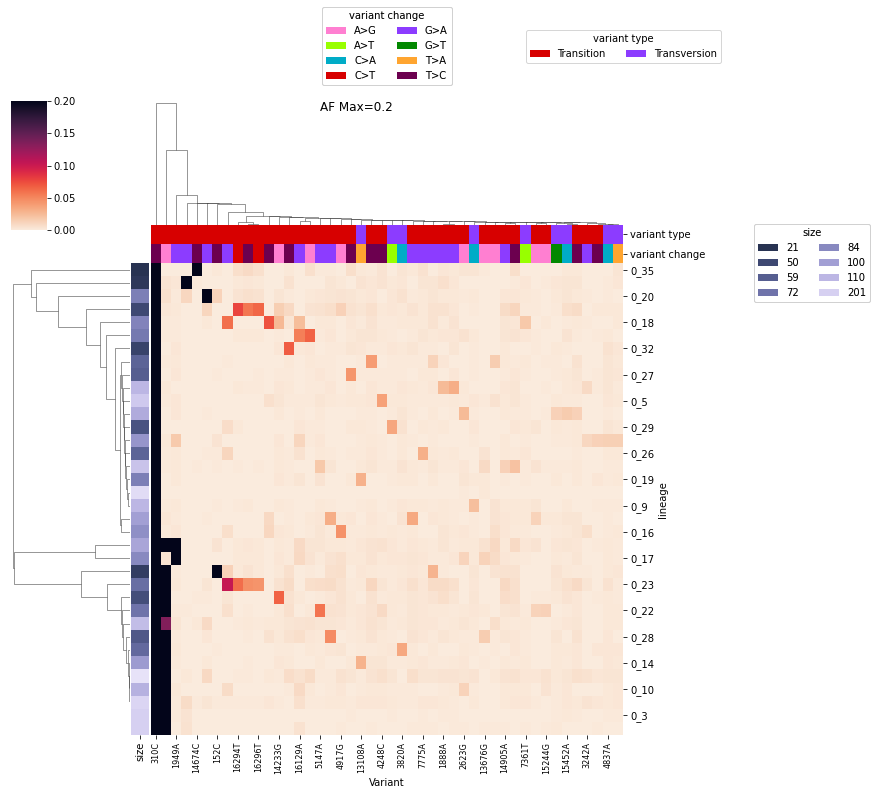

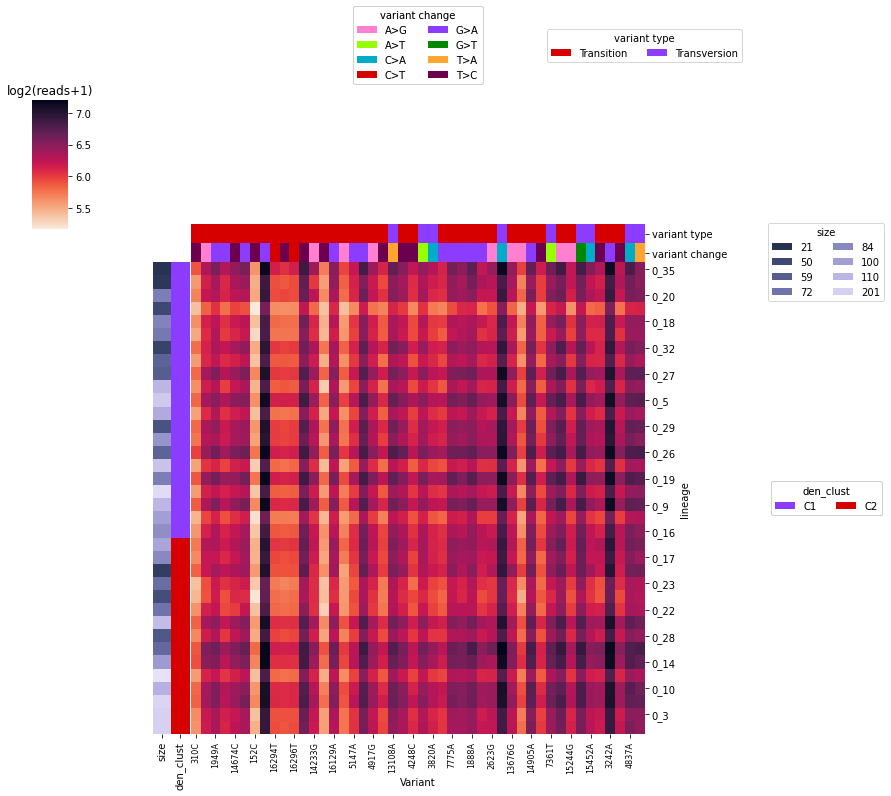

In [25]:
cluster_and_plot(mean_rmLow_af, mean_rmLow_dp, curr_clones, vmax=0.2, to_sqrt=False, name=out_f_rmLow)


In [ ]:
cluster_and_plot(mean_rmLow_af, mean_rmLow_dp, curr_clones, vmax=0.2, to_sqrt=True, name=out_f_rmLow)

distances
[0.31291 0.12724 0.27610 0.15917 0.23791 0.15587 0.27467 0.23755 0.23672
 0.31051 0.30318 0.05603 0.19619 0.23427 0.13877 0.23786 0.18594 0.30110
 0.28485 0.27323 0.17844 0.31422 0.11239 0.13772 0.27787 0.27835 0.23581
 0.27431 0.39179 0.11757 0.21319 0.26540 0.06566 0.22158 0.20801 0.25940
 0.22027 0.31291 0.31759 0.31957 0.26936 0.30948 0.26487 0.36224 0.23472
 0.27134 0.32092 0.31917 0.33074 0.41726 0.29453 0.31697 0.24120 0.26192
 0.32349 0.27536 0.24225 0.31794 0.39739 0.29704 0.37831 0.33191 0.33140
 0.23167 0.28655 0.21085 0.28477 0.29591 0.23256 0.25640 0.17638 0.34531
 0.17701 0.29358 0.27898 0.23567 0.30970 0.28807 0.12414 0.36255 0.25330
 0.17255 0.30192 0.17880 0.37447 0.26170 0.32656 0.20971 0.32837 0.11895
 0.16842 0.44013 0.34446 0.25684 0.36361 0.46611 0.09736 0.27871 0.30343
 0.12703 0.31994 0.29911 0.31112 0.32905 0.29718 0.31635 0.31488 0.23300
 0.40100 0.23446 0.30253 0.31563 0.30680 0.35122 0.39935 0.29731 0.37149
 0.34930 0.27860 0.34135 0.32995 0.32336 

In [ ]:
# mean_af.to_csv(out_f+".initInds.mean.csv")

# curr_clones[["donor","size", "log2_fold","-log10(fold p_adj)", "shuffle_sig", 
#              "ncells"]+ list(curr_labels["condition"].unique())].to_csv(out_f+".initInds.indsMeta.csv")

In [ ]:
### Cluster to get dendro results
# if mean_af.shape[0] == 1 or  mean_af.shape[1] == 1 :
#     print('no clustering needed only one var')
# else:
#     g = sns.clustermap(mean_af, row_cluster=True, col_cluster=True, vmax=0.2, vmin=0)
#     inds = g.dendrogram_row.dendrogram["leaves"]
#     cols = g.dendrogram_col.dendrogram["leaves"]
#     curr_clones = curr_clones.iloc[inds]
#     plt.close(g.fig)

### Cluster and calculate proper size

In [ ]:
cluster_and_plot(mean_, vmax, to_sqrt, name)

In [ ]:
%matplotlib inline
if not (mean_af.shape[0] == 1 or  mean_af.shape[1] == 1 ):
    if dendroThresh == "dynamic":
        clusters, link = dc.run_dynamic_hyper(np.sqrt(np.clip(mean_af, 0, 0.4)))
        #clusters, link = dc.run_dynamic_hyper(np.sqrt(mean_af))
        #clusters, link = dc.run_dynamic(mean_af, metric='euclidean', method="average", minClusterSize=1)
        curr_clones["den_clust"] = curr_clones.apply(lambda x: f'C{clusters.loc[x.name, "labels"]}', axis=1)
    else:
        den = dc.dendro_cluster(mean_af, g, d_thresh=dendroThresh)
        curr_clones = dc.add_cluster_labels(den,curr_clones)
        curr_clones

    size_pvals = dc.cluster_stats(curr_clones, out_f= out_f )

    curr_clones["donor"]= [x.split("_")[0] for x in curr_clones.index]
    curr_clones = curr_clones.loc[mean_af.index]
else:
    with open(out_f+".dendrogram_pvals.txt", "w") as f:
        f.write("no cells")
    

## Group clones using dendrogram and run stats on size differences in the groups
linkage is from dynamic dendrogram clustering based on "np.sqrt(np.clip(mean_af, 0, 0.4))"

## Plot with dendro clusters

if not (mean_af.shape[0] == 1 or  mean_af.shape[1] == 1 ):
    g = ch.plot_cluster(mean_af,row_meta=curr_clones, to_row_clust=True, to_col_clust=True,
                        col_meta=variants_df[["variant type", "variant change"]], col_clr_schemes="categorical",
                        row_clr_schemes={"size":"sequential","donor":"categorical","den_clust":"categorical"}, 
                        vmax=0.2, vmin=0, cmap="rocket_r",
                        row_linkage=link)
    plt.suptitle("Donor sqrt allele-frequency heatmap with clone and condition labels (max AF=0.2)")
    #fu.helper_save(out_f+"withEnrichmentFoldChange.NoCondition.clust.max2.AF.png",to_pdf=False)
    fu.helper_save(out_f+".dendro.NoCondition.max2.AF.png",to_pdf=True, to_svg=True)

    inds = g.dendrogram_row.dendrogram["leaves"]
    cols = g.dendrogram_col.dendrogram["leaves"]

    
    g1d = ch.plot_cluster(mean_dp.iloc[inds, cols], row_meta=curr_clones, to_row_clust=False, to_col_clust=False,
                          row_clr_schemes={"size":"sequential","donor":"categorical","den_clust":"categorical"}, 
                          col_meta=variants_df[["variant type", "variant change"]], col_clr_schemes="categorical",
                          cmap="rocket_r")
    g1d.ax_cbar.set_title("log2(reads+1)")
    fu.helper_save(out_f+".dendro.NoCondition.DP.png",to_pdf=True, to_svg=True)#, f=g1d.figure)


    mean_af = mean_af.iloc[inds,cols]
    curr_clones = curr_clones.loc[mean_af.index]

    ch.plot_cluster(mean_af,row_meta=curr_clones, row_linkage=link, to_col_clust=False,
                    col_meta=variants_df[["variant type", "variant change"]], col_clr_schemes="categorical",
                    row_clr_schemes={"size":"sequential","donor":"categorical","den_clust":"categorical"}, 
                    vmax=0.5, vmin=0, cmap="rocket_r")
    plt.suptitle("Donor sqrt allele-frequency heatmap with clone and condition labels (max AF=0.5)")
    #fu.helper_save(out_f+"withEnrichmentFoldChange.NoCondition.clust.max5.AF.png",to_pdf=False)
    fu.helper_save(out_f+".dendro.NoCondition.max5.AF.png",to_pdf=True, to_svg=True)

else:
    f = plt.figure()
    plt.title("no cells")
    f.savefig(out_f+".dendro.NoCondition.max2.AF.png")


### Save mean_af and curr_clonnes

In [ ]:

mean_af.to_csv(out_f+".mean.csv")
curr_clones.to_csv(out_f+".clones_dendro.csv")

## Remove the 0s

In [ ]:


%matplotlib inline
if not (mean_rmLow_af.shape[0] == 1 or  mean_rmLow_af.shape[1] == 1 ):
    if dendroThresh == "dynamic":
        clusters, link = dc.run_dynamic_hyper(np.clip(mean_rmLow_af, 0, 0.4))
        #clusters, link = dc.run_dynamic_hyper(np.sqrt(mean_rmLow_af))
        
        #clusters, link = dc.run_dynamic(mean_rmLow_af, metric='euclidean', method="average", minClusterSize=1)
        curr_clones["den_clust"] = curr_clones.apply(lambda x: f'C{clusters.loc[x.name, "labels"]}', axis=1)
    else:
        den = dc.dendro_cluster(mean_rmLow_af, g, d_thresh=dendroThresh)

        if verbose:
            print('icoord and color list')
            print(len(den["icoord"]))
            print(len(den["color_list"]))
            print('leaves leaves color and mean_rmLow_af shape')
            print(len(den["leaves"]))
            print(len(den["leaves_color_list"]))
            print(mean_rmLow_af.shape)
        # cluster_classes = dc.get_cluster_classes(den)
        curr_clones = dc.add_cluster_labels(den,curr_clones)
        curr_clones

    size_pvals = dc.cluster_stats(curr_clones, out_f= out_f )

    #curr_clones["donor"]= [x.split("_")[0] for x in curr_clones.index]
    curr_clones = curr_clones.loc[mean_rmLow_af.index]

    # with open(out_f + ".dendrogram_pvals.txt", "w") as f:
    #     #for l in size_pvals:
    #     f.write("\n".join(size_pvals))
else:
    with open(out_f+".dendrogram_pvals.txt", "w") as f:
        f.write("no cells")
    
curr_clones.loc[mean_rmLow_af.index]
variants_df.loc[mean_rmLow_af.columns]

#curr_clones = curr_clones.drop("donor", axis=1)



In [ ]:

if not (mean_rmLow_af.shape[0] == 1 or  mean_rmLow_af.shape[1] == 1 ):
    g = ch.plot_cluster(mean_rmLow_af, row_meta=curr_clones[["size"]], 
                        to_row_clust=True, to_col_clust=True,
                        col_meta=variants_df.loc[mean_rmLow_af.columns,["variant type"]], 
                        col_clr_schemes="categorical",
                        vmax=0.2, vmin=0, cmap="rocket_r",
                        )
    plt.suptitle("Donor allele-frequency heatmap with clone and condition labels (max AF=0.2)")
    #fu.helper_save(out_f_rmLow+"withEnrichmentFoldChange.NoCondition.clust.max2.AF.png",to_pdf=False)
    fu.helper_save(out_f_rmLow+".dendro.NoCondition.max2.AF.png",to_pdf=True)

    inds = g.dendrogram_row.dendrogram["leaves"]
    cols = g.dendrogram_col.dendrogram["leaves"]

    g1d = ch.plot_cluster(mean_rmLow_dp.iloc[inds, cols], row_meta=curr_clones[["size"]], 
                          to_row_clust=False, to_col_clust=False,
                          row_clr_schemes={"size":"sequential","donor":"categorical","den_clust":"categorical"}, 
                          col_meta=variants_df[["variant type", "variant change"]], col_clr_schemes="categorical",
                          cmap="rocket_r",
                         )
    g1d.ax_cbar.set_title("log2(reads+1)")
    fu.helper_save(out_f_rmLow+".dendro.NoCondition.DP.png",to_pdf=True)#, f=g1d.figure)


    mean_rmLow_af = mean_rmLow_af.iloc[inds,cols]
    curr_clones = curr_clones.loc[mean_rmLow_af.index]

    ch.plot_cluster(np.sqrt(mean_rmLow_af),row_meta=curr_clones, to_row_clust=False, to_col_clust=False,
                    col_meta=variants_df[["variant type", "variant change"]], col_clr_schemes="categorical",
                    row_clr_schemes={"size":"sequential","donor":"categorical","den_clust":"categorical"}, 
                    vmax=0.5, vmin=0, cmap="rocket_r")
    plt.suptitle("Donor sqrt allele-frequency heatmap with clone and condition labels (max AF=0.5)")
    #fu.helper_save(out_f_rmLow+"withEnrichmentFoldChange.NoCondition.clust.max5.AF.png",to_pdf=False)
    fu.helper_save(out_f_rmLow+".dendro.NoCondition.max5.AF.png",to_pdf=True)

else:
    f = plt.figure()
    plt.title("no cells")
    f.savefig(out_f_rmLow+".dendro.NoCondition.max2.AF.png")





In [ ]:
out_f_rmLow